A classification if where we try to classify something as one thing or another

Few types:
<li>Binary</li>
<li>Multiclass</li>
<li>Multilabel</li>


In [1]:
#creating data
from sklearn.datasets import make_circles

#make 1000 samples
n_samples = 1000

#create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [2]:
#check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
#check labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [4]:
#lets visualise our data
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y}) #all items in first label and second label like that
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


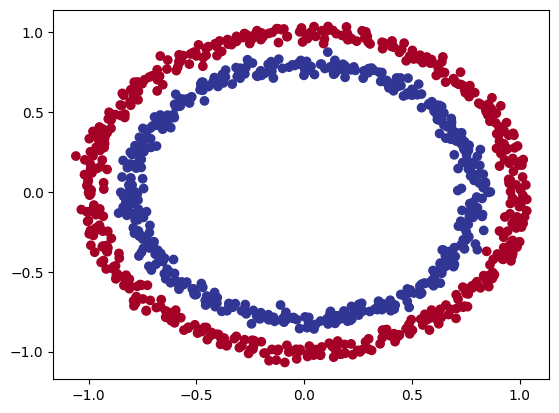

In [5]:
#plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

<h1>Input and Output Shapes</h1>

In [6]:
#check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
#how many samples we are working with
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

<h2>Steps in modelling</h2>

In [20]:
import tensorflow as tf

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 2.3493 - accuracy: 0.4720
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7443 - accuracy: 0.5010
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7110 - accuracy: 0.4950
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.4970
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.4880


In [21]:
#lets try training for longer!
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [10]:
#getting 50 percent accuracy! Not good at all!

In [11]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X,y,epochs=200,verbose=0)

In [12]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 932us/step - loss: 0.6936 - accuracy: 0.5000


[0.6935697793960571, 0.5]

In [13]:
#we have to improve the model!
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X,y,epochs=100,verbose=0)

In [14]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6974 - accuracy: 0.5110


[0.6974366903305054, 0.5109999775886536]

In [15]:
model_3.predict(X)

32/32 [==============================] - 0s 994us/step


array([[0.48293632],
       [0.5614411 ],
       [0.5654987 ],
       [0.56468534],
       [0.45200926],
       [0.56864214],
       [0.5487788 ],
       [0.47845155],
       [0.48951498],
       [0.5638696 ],
       [0.5257188 ],
       [0.5189466 ],
       [0.5556067 ],
       [0.4600893 ],
       [0.4565322 ],
       [0.4713115 ],
       [0.5501775 ],
       [0.47455823],
       [0.55403477],
       [0.51716447],
       [0.49910504],
       [0.5806369 ],
       [0.4728959 ],
       [0.48570836],
       [0.5826109 ],
       [0.5731951 ],
       [0.5399912 ],
       [0.46271983],
       [0.46756667],
       [0.4586221 ],
       [0.49270797],
       [0.5682134 ],
       [0.54674494],
       [0.46006677],
       [0.4735621 ],
       [0.5858353 ],
       [0.5689542 ],
       [0.5199956 ],
       [0.4681604 ],
       [0.5008037 ],
       [0.5135145 ],
       [0.5341135 ],
       [0.5238772 ],
       [0.45859203],
       [0.5345034 ],
       [0.5484728 ],
       [0.4569271 ],
       [0.534

To visualise our predictions, lets create a function

function name: plot_decision_boundary()

<li>Takes a model, features(X) and labels(y)</li>
<li>Create a meshgrid of the different X values</li>
<li>Make predictions across the meshgrid</li>
<li>PLot the predictions as well a line between zones</li>


In [16]:
import numpy as np

In [17]:
def plot_decision_boundary(model,X,y):
    #creating boundaries
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100)) #100 evenly spaced values between min and max specified
    
    #create X values (predictions on these)
    x_in = np.c_[xx.ravel(),yy.ravel()] #concatenates arrays along second axis
    
    #make preds
    y_pred = model.predict(x_in)
    
    #check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass predictions")
        #we have to reshape our prediction for plotting
        y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    #plot the decision boudnary
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu, alpha = 0.7)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    

313/313 [==============================] - 0s 979us/step
doing binary classification


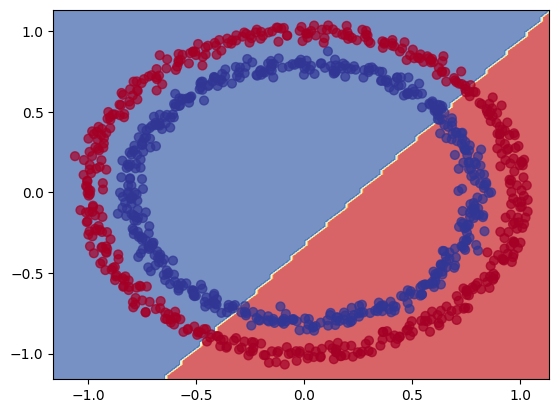

In [18]:
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)
#DATA IS CIRCULAR BUT BUT WE GET A LINE?!

In [30]:
#LETS USE IT FOR REGRESSION
tf.random.set_seed(42)

#regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) #y = X + 100

#Spilt for training and test data set
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

#fit our data
# model_3.fit(tf.expand_dims(X_reg_train,axis=-1),
#             y_reg_train,
#             epochs=100)

We compiled our model for a binary classification problem, (check losses), but now we need it for regression problem

In [31]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_reg_train,axis=-1),
            y_reg_train,
            epochs=100)    

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 484.9031 - mae: 484.9031
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 380.8567 - mae: 380.8567
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 280.1988 - mae: 280.1988
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 175.5600 - mae: 175.5600
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 70.9307 - mae: 70.9307
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 69.1195 - mae: 69.1195
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 82.3472 - mae: 82.3472
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 58.8737 - mae: 58.8737
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 45.0742 - mae: 45.0742
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 51.3750 - mae: 51.3750
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 2ms/step


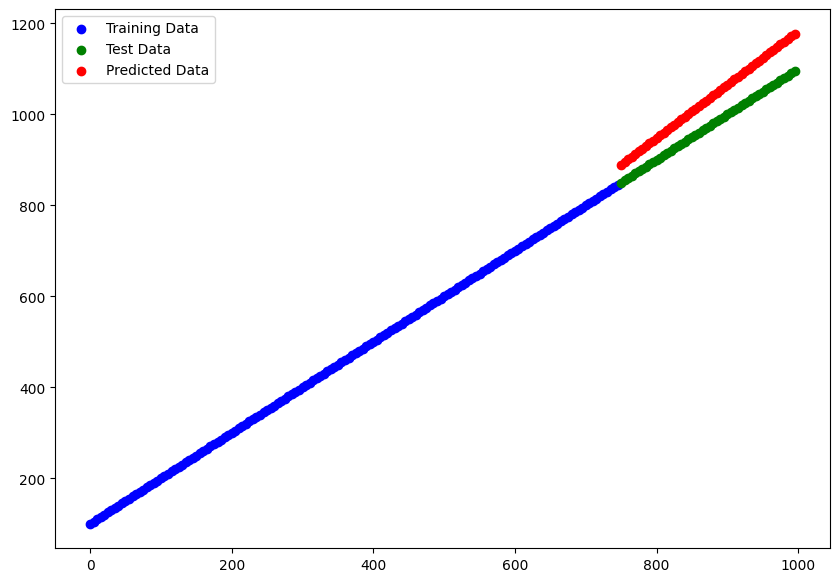

In [32]:
#make preds
y_reg_preds = model_3.predict(X_reg_test)

#plot the model's predictions 
plt.figure(figsize=(10,7))

plt.scatter(X_reg_train,y_reg_train,c="b",label="Training Data")

plt.scatter(X_reg_test,y_reg_test,c="g",label="Test Data")

plt.scatter(X_reg_test,y_reg_preds,c="r",label="Predicted Data")

plt.legend()

<h1>Non linearity</h1>

Main change is the activation keyword

In [33]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear), #1 hidden layer
    tf.keras.layers.Dense(1) #output layer
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"]
)    
history = model_4.fit(X, y, epochs=100)
        

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 6.5416 - accuracy: 0.4850
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.5380 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.5132 - accuracy: 0.4880
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4873 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4840 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4818 - accuracy: 0.4870
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4712 - accuracy: 0.4870
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4391 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4021 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 6.4070 - accuracy: 0.4850
Epoch 11/

Accuracy of 46 percent is a bit worse than before

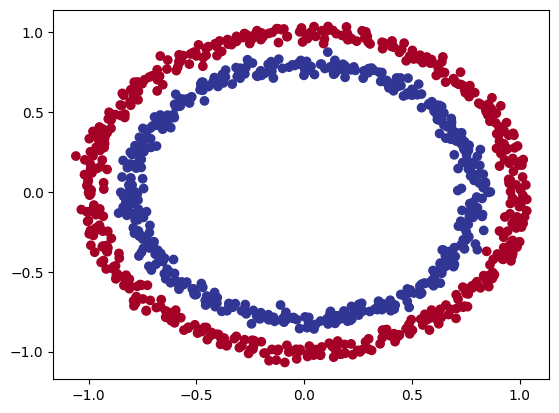

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classification


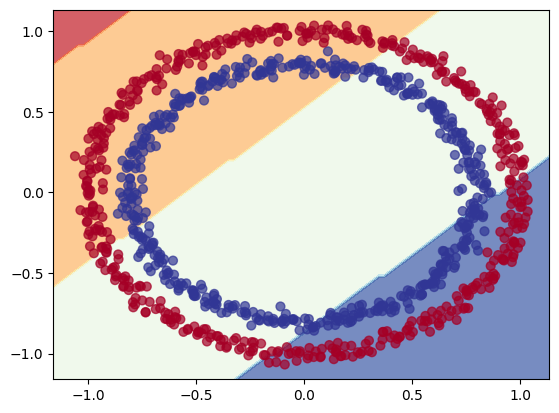

In [41]:
#Time for predictions
plot_decision_boundary(model=model_4,X=X,y=y)

In [42]:
#lets change the activation to relu
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu), #1 hidden layer
    tf.keras.layers.Dense(1) #output layer
])

model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"]
)    
history = model_5.fit(X, y, epochs=100)
        

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 1.8794 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4795 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3721 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2978 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2409 - accuracy: 0.4990
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1958 - accuracy: 0.4640
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1598 - accuracy: 0.4280
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1301 - accuracy: 0.4120
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1053 - accuracy: 0.4240
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0835 - accuracy: 0.4330
Epoch 11/

In [64]:
#Still not improved!
#lets try to add more layers
#lets change the output activation to sigmoid for binary classification
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu), #1 hidden layer
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu), #1 more hidden layer
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid) #output layer
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"]
)    
history = model_6.fit(X, y, epochs=100)
        

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6985 - accuracy: 0.4970
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.5060
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4990
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4870
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.4890
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.4920
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5010
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5010
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5050
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5100
Epoch 11/

313/313 [==============================] - 0s 829us/step
doing binary classification


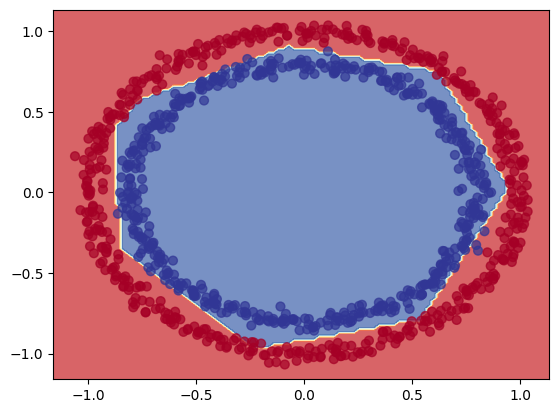

In [65]:
#Accuracy of 98???
#lets visualize!
plot_decision_boundary(model=model_6,X=X,y=y)

In [76]:
#lets see linear and non liner functions in action
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

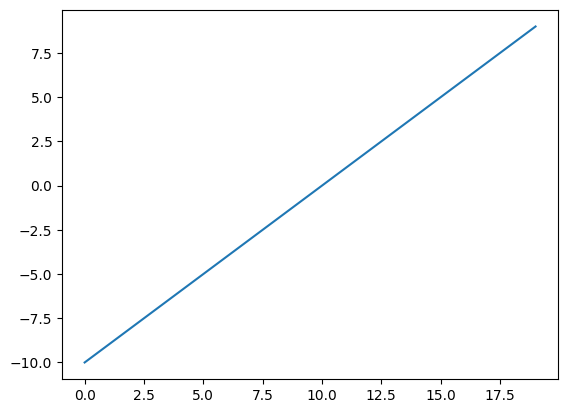

In [67]:
#visualize
plt.plot(A)

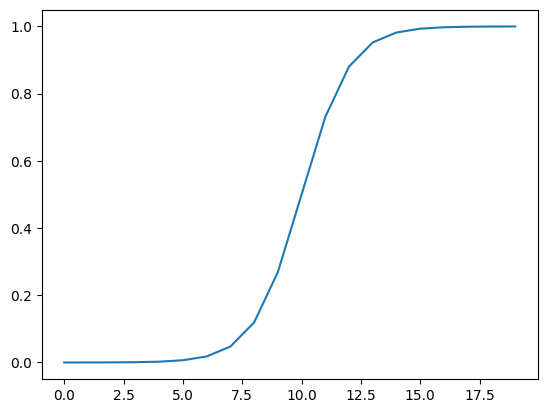

In [80]:
# we can make A into a sigmoid function like this
# tf.keras.activations.sigmoid(A)
# or
def sigmoid(x):
    return 1/(1 + tf.exp(-x))

plt.plot(sigmoid(A))

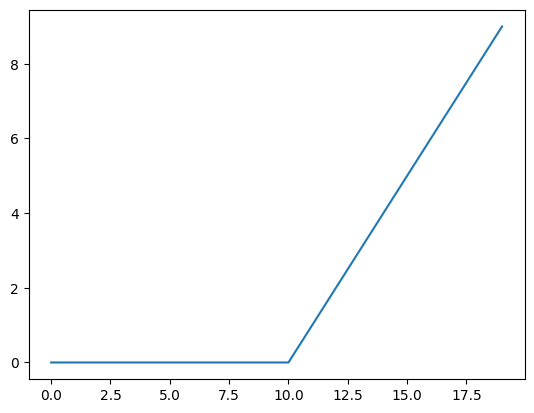

In [81]:
#Lets try out relu function
def relu(x):
    return tf.maximum(0,x)

#plotting relu
plt.plot(relu(A))

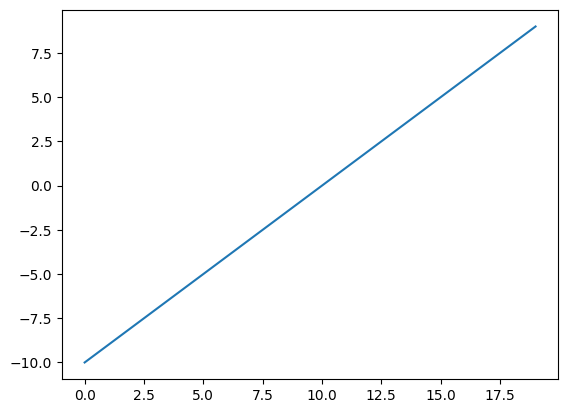

In [84]:
#lets try the linear function
tf.keras.activations.linear(A)
plt.plot(tf.keras.activations.linear(A))
#its the same lol

In [86]:
#lets improve our model
# we need a training and test dataset

len(X)

1000

In [87]:
#split into train and test
X_train,y_train = X[:800],y[:800]
X_test,y_test = X[800:],y[800:]

In [91]:
#lets recreate the model!
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"]
) #trying out 0.01 learning rate

history = model_8.fit(X_train,y_train,epochs=25)         

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6897 - accuracy: 0.5188
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5962
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.6000
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.6000
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.6288
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6483 - accuracy: 0.6400
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6294 - accuracy: 0.7425
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6055 - accuracy: 0.7325
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5682 - accuracy: 0.7912
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5334 - accuracy: 0.8350
Epoch 11/25
25/25 [

In [92]:
#lets evaluate
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0803 - accuracy: 0.9950


[0.08028947561979294, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


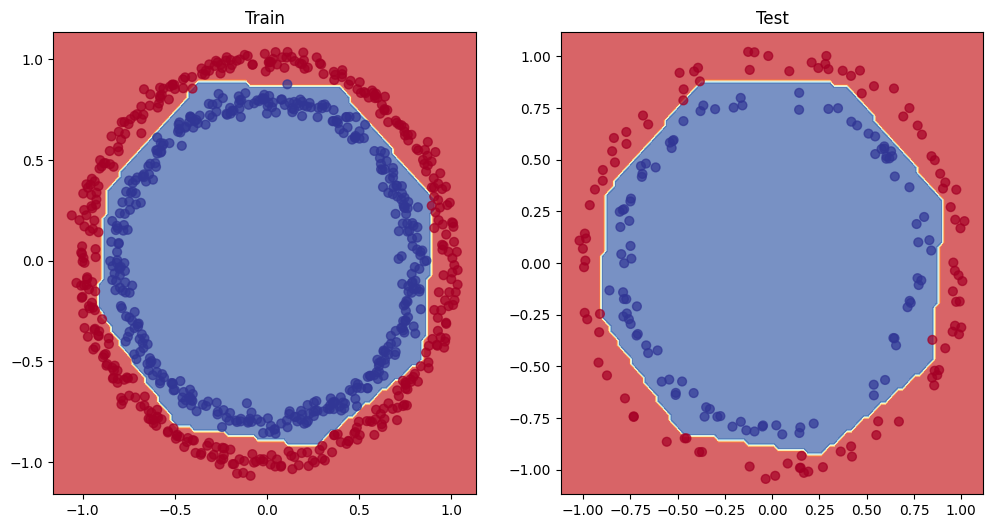

In [95]:
#plot the decision boundary for both training and test
plt.figure(figsize=(12,6))
plt.subplot(1,2,1) #1 row 2 columns and 1st value, training plot
plt.title("Train")
plot_decision_boundary(model_8,X=X_train,y=y_train)

plt.subplot(1,2,2) #2nd plot test dataset
plt.title("Test")
plot_decision_boundary(model_8,X=X_test,y=y_test)

In [97]:
#plot the loss curves
#convert history to a data frame
pd.DataFrame(history.history)

,loss,accuracy
0,0.689747,0.51875
1,0.685221,0.59625
2,0.679011,0.60000
3,0.671210,0.60000
4,0.661541,0.62875
5,0.648289,0.64000
6,0.629351,0.74250
7,0.605483,0.73250
8,0.568196,0.79125
9,0.533392,0.83500


Text(0.5, 1.0, 'Model 8 loss curves')

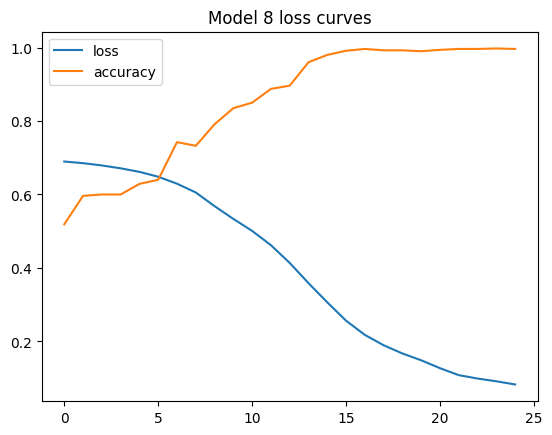

In [98]:
#plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model 8 loss curves")

In [100]:
#find the ideal learning rate

#learning rate callback - a function the model will execute while training
#another model
#another loss curve

tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])

model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
)

#changes

#create a callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
#starting from 10^-4 increment by 10^(epoch/2)

history_9 = model_9.fit(X_train,y_train,callbacks=[lr_scheduler],epochs=100)  
  


Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.5013 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.5025 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.5000 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5013 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

<Axes: xlabel='epochs'>

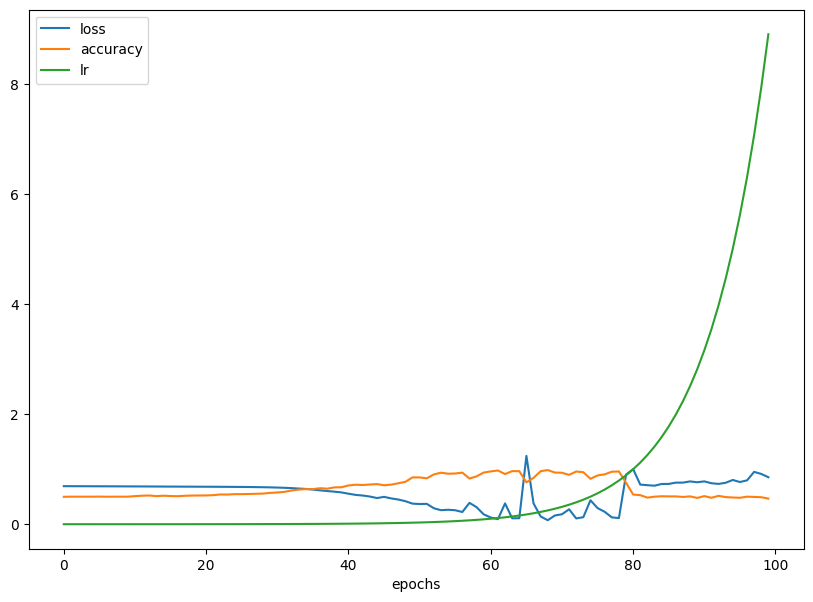

In [101]:
#check out history
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

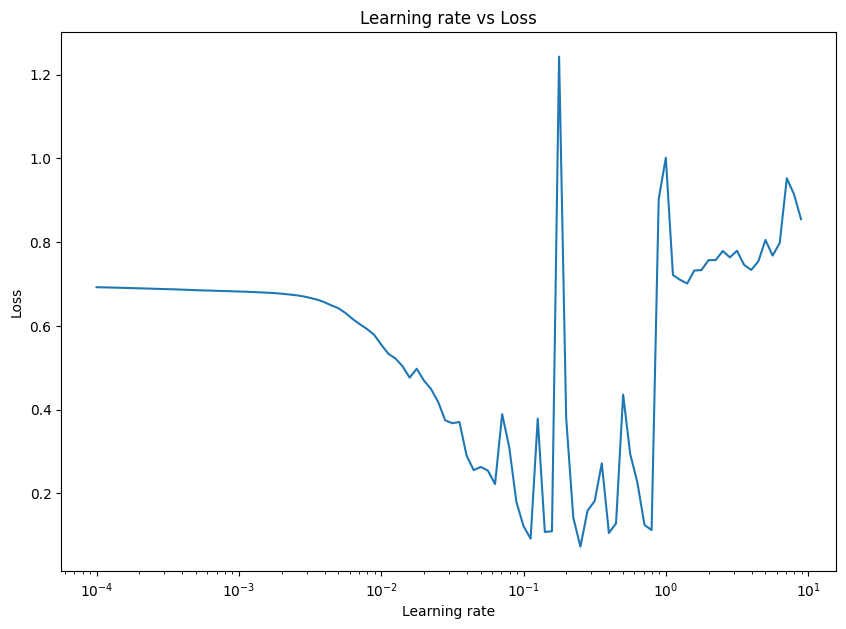

In [103]:
#plot the lr vs loss
lrs = 1e-4 * (10**(tf.range(100)/20)) #simulating the lr we created
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history["loss"]) #mul by log on x axis
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [107]:
#we see that the drop comes in between 10^-2 and 10^-1 so let us choose 0.02

In [117]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])

model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"] 
)

histroy_10 = model_10.fit(X_train,y_train,epochs=20)    

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6953 - accuracy: 0.4762
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5263
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.5938
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6222 - accuracy: 0.7375
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5643 - accuracy: 0.7525
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4575 - accuracy: 0.8325
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3769 - accuracy: 0.8838
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2808 - accuracy: 0.9275
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2206 - accuracy: 0.9600
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1716 - accuracy: 0.9825
Epoch 11/20
25/25 [

In [118]:
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0632 - accuracy: 0.9850


[0.06318370997905731, 0.9850000143051147]

In [119]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0803 - accuracy: 0.9950


[0.08028947561979294, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 981us/step
doing binary classification


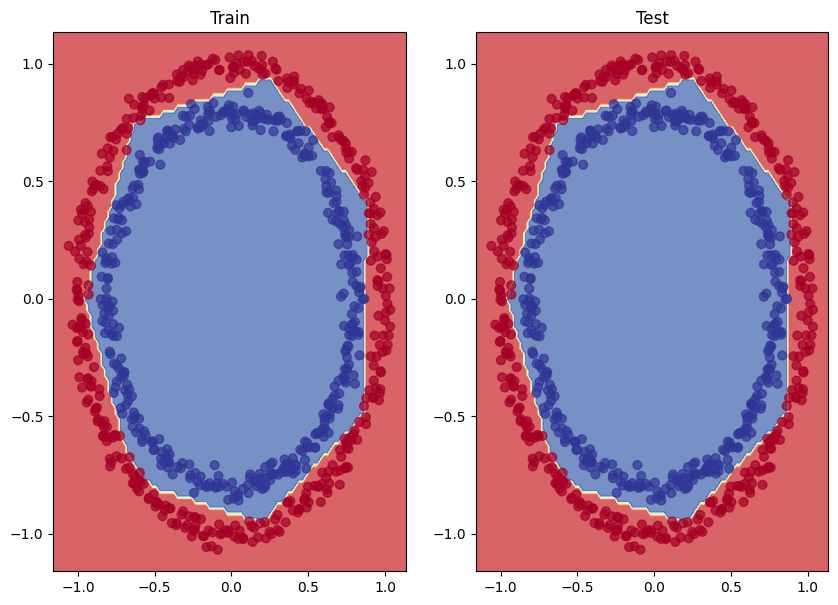

In [120]:
#plotting for train and test data sets
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_10,X=X_train,y=y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_10,X=X_train,y=y_train)

plt.show()

In [122]:
#More classification evaluation methods!
#Accuracy
#precison
#recall
#F1
#confused
#classification report

#precision recall tradeoff--> both of these are inversly proportional to each other

In [126]:
loss,accuracy = model_10.evaluate(X_test,y_test)
print(f"Model loss is {loss}")
print(f"Model accuracy is {(accuracy * 100):.2f}%")


7/7 [==============================] - 0s 1ms/step - loss: 0.0632 - accuracy: 0.9850
Model loss is 0.06318370997905731
Model accuracy is 98.50%


In [130]:
#lets build a confusion matrix!
from sklearn.metrics import confusion_matrix

#preds
y_preds =  model_10.predict(X_test)

#confusion_matrix(y_test,y_preds)
#we get error as y_test has binary values and y_preds has mixed values
y_test[:10],y_preds[:10]

7/7 [==============================] - 0s 875us/step


(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]),
 array([[0.97816086],
        [0.9997044 ],
        [0.9663202 ],
        [0.9996935 ],
        [0.09526119],
        [0.05489152],
        [0.94084   ],
        [0.00232907],
        [0.9953021 ],
        [0.34055167]], dtype=float32))

In [132]:
#lets convert
tf.round(y_preds)[:10]


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [134]:
confusion_matrix(y_test,tf.round(y_preds))

array([[98,  3],
       [ 0, 99]])

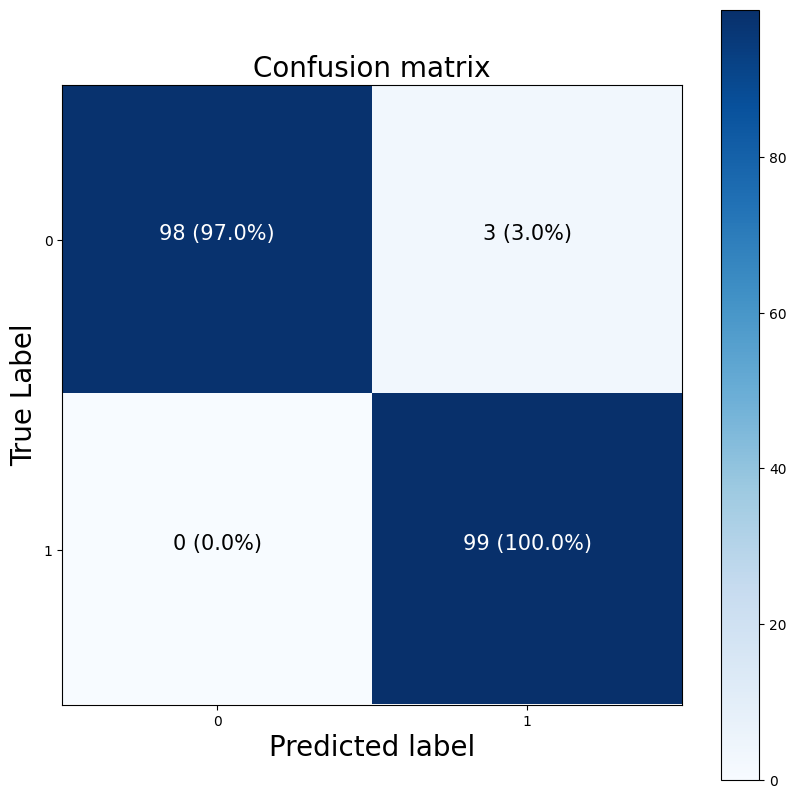

In [149]:
#lets make the matrix prettier!

def plot_confusion_matrix(y_test,y_preds):

    import itertools

    figsize = (10,10)

    cm = confusion_matrix(y_test,tf.round(y_preds))
    cm_norm = cm.astype("float") / cm.sum(axis = 1)[:,np.newaxis] #normalize
    n_classes = cm.shape[0]

    #decorationsss
    fig,ax = plt.subplots(figsize=figsize)

    #create the plot
    cax = ax.matshow(cm,cmap=plt.cm.Blues)
    fig.colorbar(cax)

    #create classes
    classes = False

    if classes:
        labels = classes
    else:
        lables = np.arange(cm.shape[0])

    #labels
    ax.set(title="Confusion matrix",
        xlabel="Predicted label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels = lables,  
        yticklabels=lables,
    )

    #set x axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    #adjust the label size
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)
    ax.title.set_size(20)

    #set threshold for diff colors
    threshold = (cm.max() + cm.min())/2

    #plot text
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=15);
        
plot_confusion_matrix(y_preds=y_preds,y_test=y_test)


In [150]:
#MULTICLASS CLASSIFICATION

#more than 2 options? --> multiclass classification

#lets build a model to classify fashion items


In [197]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#The data has already been sorted into train and test sets
(train_data,train_labels), (test_data,test_labels) = fashion_mnist.load_data()


In [154]:
#show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")


Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [156]:
#check the shape
train_data[0].shape, train_labels[0].shape

((28, 28), ())

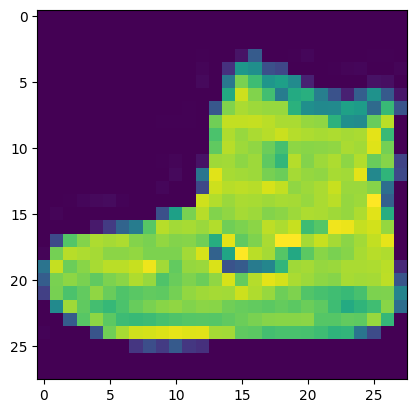

In [157]:
#plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [159]:
#create a list to index the training lables
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)
#we are dealing with 10 classes!

10

Text(0.5, 1.0, 'T-shirt/top')

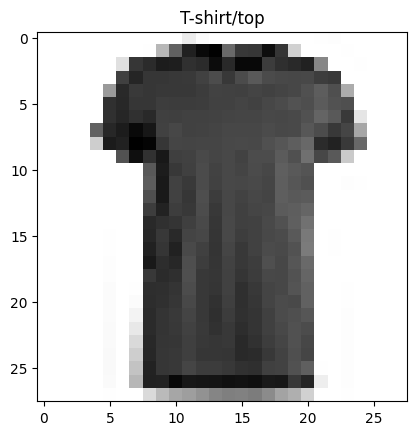

In [168]:
#lets plot a example image
index_of_choice = 17
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])


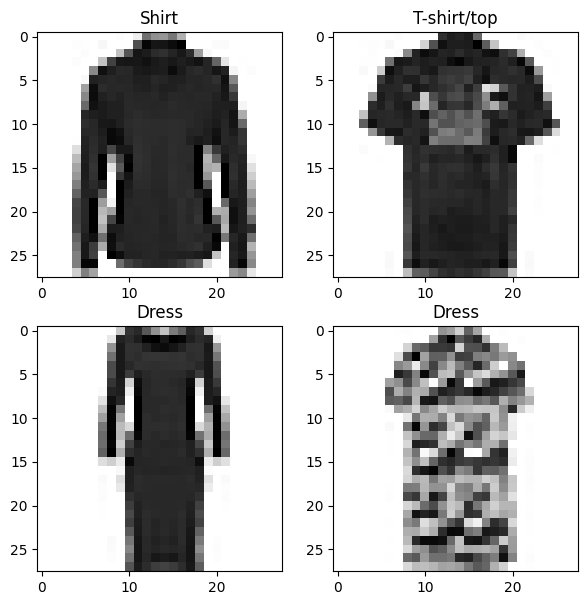

In [176]:
#Plot multiple random images
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis = False

In [188]:
#Building the model

#pretty similar to binary but a few changes

#input shape = 28x28
#output shape = 10 (10 classes)
#loss function = tf.keras.losses.CatergoricalCrossentropy()
#the loss function expects data in one hot encoding, to use integer values we use SparseCatergoricalCrossentropy()
#output layer activation: softmax

tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    # we need to flatten the data to prevent any shape error, here shape becomes 28*28 = None,784
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),

    #output layer
    tf.keras.layers.Dense(10,activation="softmax")
])

model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"]
)
                 
non_norm_history = model_11.fit(train_data,tf.one_hot( train_labels,depth=10),epochs=10,validation_data=(test_data ,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1537 - accuracy: 0.2183 - val_loss: 1.9027 - val_accuracy: 0.2612
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7457 - accuracy: 0.2822 - val_loss: 1.6417 - val_accuracy: 0.2960
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5983 - accuracy: 0.3318 - val_loss: 1.5679 - val_accuracy: 0.3538
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5450 - accuracy: 0.3560 - val_loss: 1.5248 - val_accuracy: 0.3808
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5160 - accuracy: 0.3664 - val_loss: 1.5013 - val_accuracy: 0.3839
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4982 - accuracy: 0.3728 - val_loss: 1.5099 - val_accuracy: 0.3718
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4863 - accuracy: 0.3754 - val_loss: 1.4777 - val_accuracy:

In [189]:
#check the summary
model_11.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_98 (Dense)            (None, 4)                 3140      
                                                                 
 dense_99 (Dense)            (None, 4)                 20        
                                                                 
 dense_100 (Dense)           (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [191]:
#check the min and max
train_data.min(), train_data.max()
#neural networks prefer data to be normalised!

(0, 255)

In [198]:
#we can normalize by dividing by maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [199]:
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [205]:
#lets build normalised model!

model_12 = tf.keras.Sequential([
    
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])

model_12.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

norm_history = model_12.fit(train_data_norm,tf.one_hot(train_labels,depth=10),epochs=10,validation_data=(test_data_norm,tf.one_hot(test_labels,depth=10)))

Epoch 1/10


2023-03-25 20:19:18.606343: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1856/1875 [============================>.] - ETA: 0s - loss: 1.3038 - accuracy: 0.5347

2023-03-25 20:19:22.789273: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 1.3005 - accuracy: 0.5360 - val_loss: 0.9940 - val_accuracy: 0.6517
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9025 - accuracy: 0.6728 - val_loss: 0.8691 - val_accuracy: 0.6788
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8099 - accuracy: 0.7024 - val_loss: 0.8021 - val_accuracy: 0.6992
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7699 - accuracy: 0.7180 - val_loss: 0.7769 - val_accuracy: 0.7123
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7486 - accuracy: 0.7275 - val_loss: 0.7555 - val_accuracy: 0.7325
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7317 - accuracy: 0.7351 - val_loss: 0.7725 - val_accuracy: 0.7325
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7208 - accuracy: 0.7404 - val_loss: 0.7500 - val_accuracy: 0.7222
Epo

In [204]:
#definitely the accuracy has increased!
#always normalize!!!